In [23]:
import time
import seaborn as sns
import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
from imageloader import ImageLoader
from knearestneighbors import KNearestNeighbors
from rangequery import RangeQuery
from histogramcalculation import HistogramCalculation
from siftcalculation import SIFTCalculation
sns.set(style="darkgrid")

In [2]:
image_count, images = ImageLoader().get_images_root('../web/static/dataset/images/vac')
knn_sift = KNearestNeighbors()
knn_hist = KNearestNeighbors()
range_sift = RangeQuery(5)
range_hist = RangeQuery(3)
hist_c = HistogramCalculation()
sift_c = SIFTCalculation(1000)

In [3]:
hsv = True
bins = (8,12,12)
channels = [0, 1, 2]
ranges = [0,180,0,256,0,256]

In [ ]:
im = cv.imread(images[150])
im1 = cv.resize(im, (300,300),cv.INTER_AREA)
im2 = cv.resize(im, (300,300),cv.INTER_NEAREST)
im3 = cv.resize(im, (300,300),cv.INTER_LINEAR)
im4 = cv.resize(im, (300,300),cv.INTER_CUBIC)
im5 = cv.resize(im, (300,300),cv.INTER_LANCZOS4)
plt.imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(im2,cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(im3,cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(im4,cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(im5,cv.COLOR_BGR2RGB))
plt.show()

In [4]:
hist_times = []

In [5]:
for image in images:

    image_time_start = time.time()
    hist_c.calculate_for_image(cv.imread(image), channels=channels, bins=bins, ranges=ranges,hsv=hsv, resize=True)
    image_time_end = time.time()
    hist_times.append(image_time_end-image_time_start)

In [6]:
hist_total_start = time.time()
for image in images:
    hist_c.calculate_for_image(cv.imread(image), channels=channels, bins=bins, ranges=ranges,hsv=hsv, resize=True)
hist_total_end = time.time()
hist_total = (hist_total_end-hist_total_start)
print(hist_total)

159.14449214935303


In [7]:
df_hist_times = pd.DataFrame(hist_times)
df_hist_times.head()

0
0  0.189597
1  0.153227
2  0.211525
3  0.093408
4  0.514209

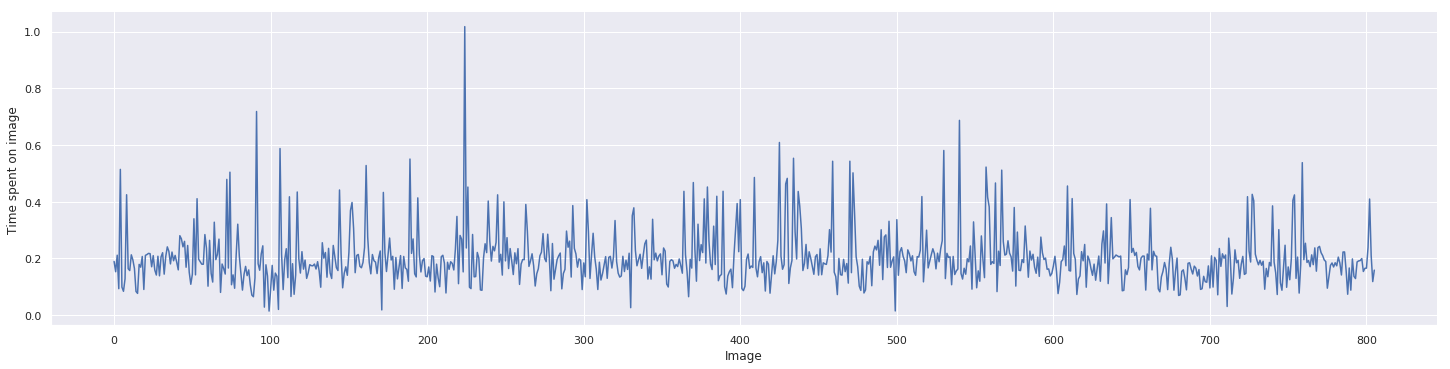

In [8]:
plot = sns.relplot(kind="line", data=df_hist_times, size=5, aspect=4)
plot.set(xlabel='Image',ylabel='Time spent on image')
plot._legend.remove()
plot.savefig("plots/histogram_resized_times.png")

In [9]:
average_time_hist = df_hist_times.mean()
print(average_time_hist)

0    0.202229
dtype: float64


In [24]:
sift_c.add_code_book(np.load('code_book.npy'))

In [25]:
sift_total_start = time.time()
for image in images:
    sift_c.calculate_word_histogram_for_image(image)
sift_total_start = time.time()
sift_total = (sift_total_start-sift_total_start)
print(sift_total)

0.0


In [27]:
sift_desc_times = []
for image in images:
    image_time_start = time.time()
    sift_c.calculate_word_histogram_for_image(image)
    image_time_end = time.time()
    sift_desc_times.append(image_time_end-image_time_start)

In [28]:
df_sift_times = pd.DataFrame(sift_desc_times)
df_sift_times.head()

0
0  4.204528
1  2.038814
2  3.309786
3  1.189601
4  5.601009

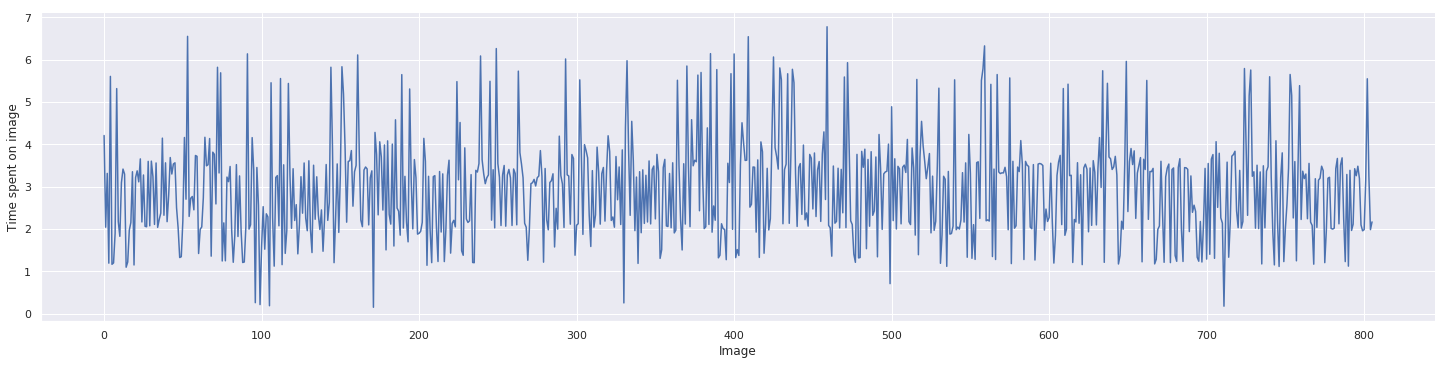

In [29]:
plot = sns.relplot(kind="line", data=df_sift_times, size=5, aspect=4)
plot.set(xlabel='Image',ylabel='Time spent on image')
plot._legend.remove()
plot.savefig("plots/sift_times_1000_resized.png")


In [30]:
average_time_sift = df_sift_times.mean()
print(average_time_sift)

0    2.939499
dtype: float64


In [39]:
orb = cv.ORB_create()
s = time.time()
for img in images[0:1]:
    img = cv.imread(img,0)
    kp = orb.detect(img)
    kp, des = orb.compute(img, kp)
    print(len(des))
    e = time.time()
    print(e-s)

500
0.3295280933380127
